### Section 4.2: Node Feature Encoding

In this section, we will focus on creating feature vectors for each node (word) in our NLP graph representation. Node features are crucial for providing meaningful input to the GCN, as they represent the unique properties of each word in a sentence. Feature vectors can include syntactic, semantic, or even pre-trained embeddings, depending on the task and data.

**Contents:**

1. **Introduction to Node Feature Encoding**
2. **Types of Node Features**
3. **Implementing Node Feature Encoding**
4. **Combining Features for Enhanced Representation**
5. **Code Walkthrough**

---



### 1. Introduction to Node Feature Encoding

- **Purpose of Node Features**: Node features provide context to each word in the graph, allowing the GCN to leverage this information when propagating messages across nodes.
- **Examples of Node Features**:
  - **One-Hot Encoding**: Each word is represented as a unique vector with a “1” in the position corresponding to the word’s index in the vocabulary.
  - **POS Tags**: Part-of-speech tags that describe syntactic roles.
  - **Pre-trained Word Embeddings**: Richer representations using embeddings like Word2Vec, GloVe, or BERT.

**Example**:
For a sentence like “The cat sat on the mat,” we might represent each word with one-hot vectors or embeddings that capture both syntactic and semantic details.

---



### 2. Types of Node Features

Here, we’ll look at various approaches for encoding node features. Depending on the complexity of the task, you might choose simpler or more advanced representations.



#### A. One-Hot Encoding

- **Definition**: A vector with all elements as “0” except for one element, which is “1” at the position corresponding to the word’s index in the vocabulary.
- **Usage**: One-hot encoding is simple but doesn’t capture any semantic similarity between words.

**Example**:
  - Vocabulary: `[“The”, “cat”, “sat”, “on”, “the”, “mat”]`
  - One-Hot Encoding for “cat”: `[0, 1, 0, 0, 0, 0]`



#### B. POS Tag Features

- **Definition**: Use POS tags as features, which are one-hot encoded or embedded.
- **Benefit**: Captures syntactic role information (e.g., noun, verb), providing structure to the GCN by differentiating between nouns, verbs, etc.

**Example**:
  - POS Tags for `[“The”, “cat”, “sat”, “on”, “the”, “mat”]` might be `[DT, NN, VBD, IN, DT, NN]`.



#### C. Word Embeddings

- **Definition**: Use pre-trained embeddings like Word2Vec, GloVe, or contextual embeddings like BERT.
- **Benefit**: Captures semantic relationships and is suitable for larger datasets where word meaning needs to be preserved.

**Example**:
  - Word embedding for “cat” might be `[0.2, -0.4, 0.5, …]`, where each value represents a dimension in the embedding space.

---



### 3. Implementing Node Feature Encoding

We’ll now implement each type of node feature encoding in Python using spaCy and other tools. We’ll assume the sentence is parsed, and we’re extracting features for each word.



#### A. One-Hot Encoding


In [1]:
import numpy as np

# Define a vocabulary of unique words
vocab = ["The", "cat", "sat", "on", "the", "mat"]
# Create a dictionary that maps each word in the vocabulary to a unique index
vocab_dict = {word: i for i, word in enumerate(vocab)}

# Function to one-hot encode each word in the sentence based on the vocabulary
def one_hot_encode(sentence_tokens, vocab_dict):
    features = []
    for token in sentence_tokens:
        # Initialize a zero vector for one-hot encoding
        one_hot = [0] * len(vocab_dict)
        # Set the index corresponding to the token to 1
        one_hot[vocab_dict[token]] = 1
        features.append(one_hot)
    return np.array(features)

# Sample sentence represented as tokens
sentence_tokens = ["The", "cat", "sat", "on", "the", "mat"]

# Generate one-hot encoded features for each token in the sentence
one_hot_features = one_hot_encode(sentence_tokens, vocab_dict)

# Print the resulting one-hot encoded feature matrix
print("One-Hot Features:\n", one_hot_features)


One-Hot Features:
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


### Explanation:
1. **Vocabulary and Mapping**:
   - Defines a vocabulary of unique words and maps each word to a unique index for encoding.
   
2. **One-Hot Encoding Function**:
   - Iterates over each word in the sentence.
   - Creates a zero vector (of vocabulary length) and sets the index of the current word to `1`, resulting in a one-hot encoded vector.

3. **Output**:
   - The function returns a 2D array where each row represents the one-hot encoding of a word in the sentence, based on the predefined vocabulary. This encoding is essential for converting text into a numerical form for further processing.

**Visualization**

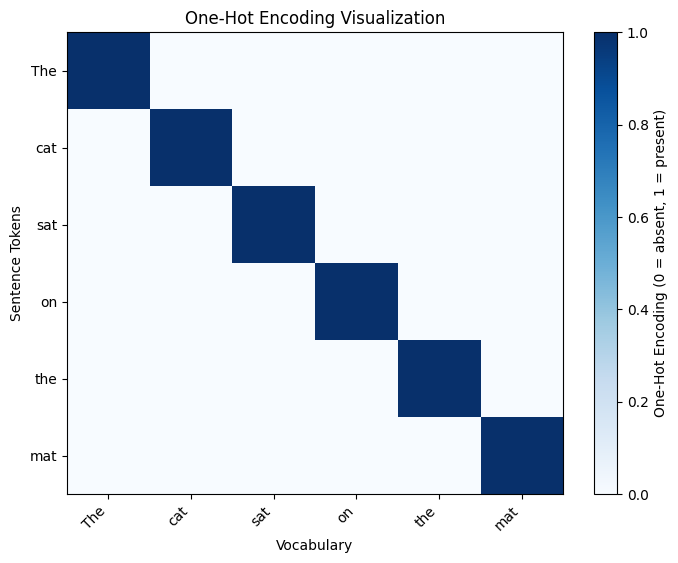

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the one-hot encoding as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for readability
plt.imshow(one_hot_features, cmap="Blues", aspect="auto")  # Display one-hot encoding matrix as heatmap

# Adding labels for clarity
plt.colorbar(label="One-Hot Encoding (0 = absent, 1 = present)")  # Color bar to show encoding values
plt.xticks(ticks=np.arange(len(vocab)), labels=vocab, rotation=45, ha="right")  # Label x-axis with vocab words
plt.yticks(ticks=np.arange(len(sentence_tokens)), labels=sentence_tokens)  # Label y-axis with sentence tokens
plt.xlabel("Vocabulary")  # Label for x-axis
plt.ylabel("Sentence Tokens")  # Label for y-axis
plt.title("One-Hot Encoding Visualization")  # Title of the plot
plt.show()  # Display the plot



#### B. POS Tag Features

Using POS tags as features can provide syntactic information that helps GCNs interpret grammatical structures. Here, we’ll use spaCy to get POS tags and one-hot encode them.

  

In [4]:
import spacy
import numpy as np

# Load the spaCy English model for POS tagging
nlp = spacy.load("en_core_web_sm")

# Function to generate one-hot encoded POS tag features for a sentence
def pos_tag_features(sentence):
    # Process the sentence with spaCy to get tokens and their POS tags
    doc = nlp(sentence)

    # Extract POS tags for each token in the sentence
    pos_tags = [token.pos_ for token in doc]

    # Identify unique POS tags and create a mapping to indices
    unique_tags = list(set(pos_tags))  # Set of unique POS tags in the sentence
    pos_dict = {tag: i for i, tag in enumerate(unique_tags)}  # Map each POS tag to a unique index

    # Generate one-hot encoded vectors for each POS tag
    features = []
    for tag in pos_tags:
        # Initialize a zero vector for one-hot encoding
        one_hot = [0] * len(pos_dict)
        # Set the index corresponding to the POS tag to 1
        one_hot[pos_dict[tag]] = 1
        # Append the one-hot encoded vector to the list
        features.append(one_hot)

    # Convert the list of one-hot vectors to a numpy array for easy processing
    return np.array(features), pos_tags

# Example sentence to test POS tagging and encoding
sentence = "The cat sat on the mat."

# Generate one-hot encoded POS tag features for each token in the sentence
pos_features, pos_tags = pos_tag_features(sentence)

# Display the POS tags and their one-hot encoded features
print("POS Tags:", pos_tags)  # List of POS tags for each word in the sentence
print("POS Features (One-Hot Encoded):\n", pos_features)  # One-hot encoded vectors for each POS tag


POS Tags: ['DET', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN', 'PUNCT']
POS Features (One-Hot Encoded):
 [[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]]



#### C. Word Embeddings

We can use spaCy’s pre-trained embeddings to get semantic feature vectors for each word.



In [6]:
import spacy
import numpy as np

# Load the spaCy English model with word vectors
nlp = spacy.load("en_core_web_sm")

def word_embedding_features(sentence):
    # Process the sentence with spaCy to get tokens
    doc = nlp(sentence)

    # Extract word embedding vectors for each token
    # Each token.vector is a dense vector that captures semantic meaning
    features = [token.vector for token in doc]

    return np.array(features)

# Example sentence to test POS tagging and encoding
sentence = "The cat sat on the mat."

# Generate word embedding features for each word in the sentence
embedding_features = word_embedding_features(sentence)

# Display the word embedding features for each word in the sentence
print("Word Embedding Features:\n", embedding_features)
print("Word Embedding Features Shape:", embedding_features.shape)


Word Embedding Features:
 [[ 1.04657722e+00 -6.31252289e-01 -5.65400481e-01  2.71194553e+00
  -1.08006406e+00 -4.91874665e-02 -7.92101145e-01  6.15978241e-02
  -6.19888902e-01  1.61662912e+00  1.44927073e+00  1.31265175e+00
  -6.79029822e-01 -1.23056579e+00 -7.89540887e-01 -1.08210814e+00
  -8.04644823e-01  1.62619650e+00 -8.71259809e-01  4.05369401e-01
  -1.13361990e+00 -3.73260915e-01 -6.66864336e-01 -1.63241553e+00
   1.86730170e+00 -2.41321623e-01  1.08529782e+00  8.69939923e-02
  -9.42808092e-02  6.03703380e-01  1.21503687e+00 -1.20307064e+00
   9.76256788e-01 -2.00130320e+00 -6.65152892e-02  9.54347253e-01
   2.69088596e-01 -7.18021035e-01  2.59877503e-01  3.88989949e+00
  -8.00759196e-02  1.25189519e+00 -1.36160421e+00  9.78393674e-01
  -9.92334247e-01 -8.07107836e-02 -4.88294452e-01  2.33289671e+00
   1.28384423e+00  9.28974450e-02 -9.71150041e-01 -3.68492514e-01
   5.58374643e-01  5.80413699e-01  8.44774604e-01  7.82623112e-01
  -1.10746634e+00  9.84405160e-01 -9.17653143e-01 


### 4. Combining Features for Enhanced Representation

In many applications, combining different types of features can lead to better performance. For example, you might concatenate one-hot encodings with word embeddings to create a richer representation for each node.



#### Code Example: Combining One-Hot and POS Features



In [7]:
import spacy
import numpy as np

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# ... (your existing functions: one_hot_encode, pos_tag_features) ...

# Updated combined_features function
def combined_features(sentence, vocab_dict):
    """
    Combines one-hot encoded features and POS tag features for each token in a sentence.

    Parameters:
    - sentence (str): The full sentence to process.
    - vocab_dict (dict): Dictionary mapping each vocabulary word to an index.

    Returns:
    - np.ndarray: A 2D array where each row is a concatenation of one-hot and POS features for a token.
    """
    # Tokenize the sentence with spaCy for consistent tokenization
    doc = nlp(sentence)
    sentence_tokens = [token.text for token in doc]  # Use spaCy tokens to ensure alignment

    # Generate one-hot encoded features for the tokens using spaCy tokens,
    # skipping tokens not in vocab_dict
    one_hot_feats = []
    for token in sentence_tokens:
        if token in vocab_dict:
            one_hot_feats.append(one_hot_encode([token], vocab_dict)[0])  # Encode and append if in vocab
        else:
            # Handle tokens not in vocab_dict, e.g., by skipping or using a special encoding
            # Here, we skip them:
            print(f"Skipping token '{token}' not in vocabulary")
            # You could also use a special encoding like an "unknown" token
            # or assign it to a specific index in your vocab_dict

    # Generate POS tag features for the tokens, filtering to match one-hot encoded tokens
    pos_feats, _ = pos_tag_features(sentence)
    #Filter pos_feats to align with one_hot_feats
    pos_feats = [pos_feats[i] for i, token in enumerate(sentence_tokens) if token in vocab_dict]


    # Concatenate one-hot and POS features along the columns for each token
    combined_feats = np.concatenate((np.array(one_hot_feats), np.array(pos_feats)), axis=1)

    return combined_feats

# Define the vocabulary dictionary based on the unique tokens
vocab = ["The", "cat", "sat", "on", "the", "mat"]
vocab_dict = {word: i for i, word in enumerate(vocab)}

# Example sentence
sentence = "The cat sat on the mat."

# Generate combined one-hot and POS tag features for each token
combined_feats = combined_features(sentence, vocab_dict)

# Display the combined feature matrix
print("Combined One-Hot and POS Features:\n", combined_feats)

Skipping token '.' not in vocabulary
Combined One-Hot and POS Features:
 [[1 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1]]



### 5. Code Walkthrough: Complete Node Feature Encoding Pipeline

Below is a complete pipeline to extract one-hot, POS, and embedding features for each word in a sentence, allowing you to experiment with different node feature representations for GCNs.



In [8]:
import spacy
import numpy as np

# Load the spaCy English model for NLP processing
nlp = spacy.load("en_core_web_sm")

# Define the vocabulary and create a dictionary for one-hot encoding
vocab = ["The", "cat", "sat", "on", "the", "mat"]
vocab_dict = {word: i for i, word in enumerate(vocab)}

# One-hot encoding function using spaCy tokens
def one_hot_encode(sentence_tokens, vocab_dict):
    """
    Generates one-hot encoded features for each token based on the vocabulary.

    Parameters:
    - sentence_tokens (list): List of tokens in the sentence.
    - vocab_dict (dict): Dictionary mapping each vocabulary word to an index.

    Returns:
    - np.ndarray: One-hot encoded feature matrix.
    """
    features = []
    for token in sentence_tokens:
        # Create a zero vector for each token
        one_hot = [0] * len(vocab_dict)
        # Set the index of the token to 1
        if token in vocab_dict:
            one_hot[vocab_dict[token]] = 1
        features.append(one_hot)
    return np.array(features)

# POS tagging and encoding function
def pos_tag_features(sentence):
    """
    Generates one-hot encoded POS tag features for each token in the sentence.

    Parameters:
    - sentence (str): The input sentence.

    Returns:
    - np.ndarray: POS tag feature matrix.
    """
    doc = nlp(sentence)
    pos_tags = [token.pos_ for token in doc]
    unique_tags = list(set(pos_tags))  # Get unique POS tags
    pos_dict = {tag: i for i, tag in enumerate(unique_tags)}  # Map tags to indices

    features = []
    for tag in pos_tags:
        # Create a zero vector for each POS tag
        one_hot = [0] * len(pos_dict)
        # Set the index of the POS tag to 1
        one_hot[pos_dict[tag]] = 1
        features.append(one_hot)
    return np.array(features)

# Word embedding feature extraction
def word_embedding_features(sentence):
    """
    Generates word embeddings for each token in the sentence.

    Parameters:
    - sentence (str): The input sentence.

    Returns:
    - np.ndarray: Matrix of word embeddings for each token.
    """
    doc = nlp(sentence)
    features = [token.vector for token in doc]  # Extract embedding for each token
    return np.array(features)

# Function to combine all features: one-hot, POS, and embeddings
def create_combined_features(sentence, vocab_dict):
    """
    Combines one-hot, POS tag, and word embedding features for each token.

    Parameters:
    - sentence (str): Full sentence for POS and embedding extraction.
    - vocab_dict (dict): Dictionary for one-hot encoding.

    Returns:
    - np.ndarray: Combined feature matrix.
    """
    # Tokenize sentence using spaCy for consistent tokens
    doc = nlp(sentence)
    sentence_tokens = [token.text for token in doc]  # Get tokens from spaCy

    # Generate one-hot encoded features using consistent spaCy tokens
    one_hot_feats = one_hot_encode(sentence_tokens, vocab_dict)

    # Generate POS tag features and word embeddings
    pos_feats = pos_tag_features(sentence)  # POS tag features
    embedding_feats = word_embedding_features(sentence)  # Word embeddings

    # Concatenate all features along the columns
    combined_feats = np.concatenate((one_hot_feats, pos_feats, embedding_feats), axis=1)
    return combined_feats

# Example sentence
sentence = "The cat sat on the mat."

# Generate combined features
combined_features = create_combined_features(sentence, vocab_dict)

# Display the combined feature matrix
print("Combined Node Features:\n", combined_features)


Combined Node Features:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.04657722e+00
  -6.31252289e-01 -5.65400481e-01  2.71194553e+00 -1.08006406e+00
  -4.91874665e-02 -7.92101145e-01  6.15978241e-02 -6.19888902e-01
   1.61662912e+00  1.44927073e+00  1.31265175e+00 -6.79029822e-01
  -1.23056579e+00 -7.89540887e-01 -1.08210814e+00 -8.04644823e-01
   1.62619650e+00 -8.71259809e-01  4.05369401e-01 -1.13361990e+00
  -3.73260915e-01 -6.66864336e-01 -1.63241553e+00  1.86730170e+00
  -2.41321623e-01  1.08529782e+00  8.69939923e-02 -9.42808092e-02
   6.03703380e-01  1.21503687e+00 -1.20307064e+00  9.76256788e-01
  -2.00130320e+00 -6.65152892e-02  9.54347253e-01  2.69088596e-01
  -7.18021035e-01  2.59877503e-01  3.88989949e+00 -8.00759196e-02
   1.25189519e+00 -1.36160421e+00  9.78393674e-01 -9.92334247e-01
  -8.07107836e-02 -4.88294452e-01  2.33289671e+00  


### Summary and Key Takeaways

- **Node Feature Encoding**: Crucial for providing meaningful inputs to GCNs. Different encodings capture various aspects of word information, such as syntactic roles or semantic meanings.
- **Types of Features**: Simple one-hot vectors to more complex embeddings offer flexibility in capturing information for NLP tasks.
- **Combined Features**: Leveraging multiple types of features (e.g., one-hot + POS + embeddings) can improve GCN performance by providing both syntactic and semantic details.

With the adjacency matrix and node features ready, we have completed our data preparation pipeline for a GCN in NLP. In the next section, we’ll use these prepared inputs to build and train a GCN model on a sample NLP task, such as sentence classification or part-of-speech tagging.